# Extracting the yellow balloon using RGB/HSV colour spaces

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
image = cv2.imread('images/water_balloons.jpg')
image_copy = np.copy(image)

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2HSV)

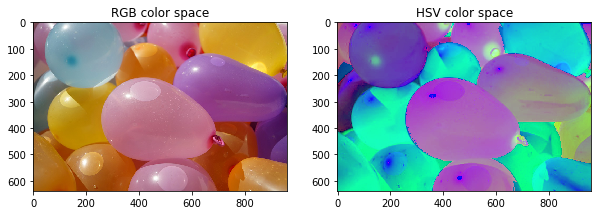

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.set_title('RGB color space')
ax1.imshow(image)
ax2.set_title('HSV color space')
ax2.imshow(image_copy)


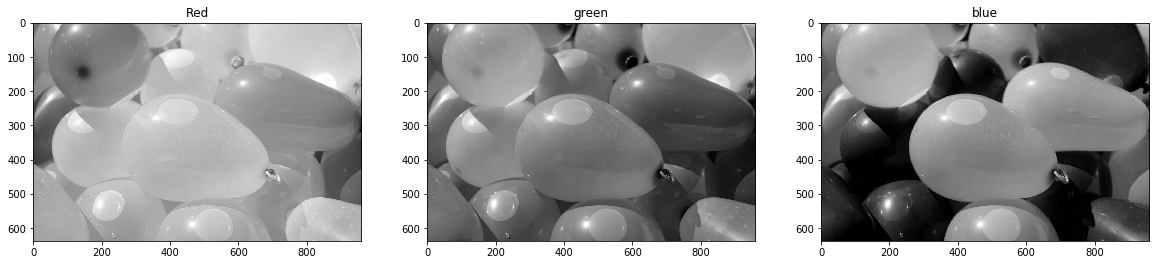

In [11]:
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# now lets plot each of these in gray scale to get the relative intensity's

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.set_title('Red')
ax1.imshow(r, cmap='gray')
ax2.set_title('green')
ax2.imshow(g, cmap='gray')
ax3.set_title('blue')
ax3.imshow(b, cmap='gray')

# the brighter pixels indicate a higher value of red, green or blue. We can see that the pink balloon has higher value 
# of red. But there are a lot of variation when the balloon is in the shadow

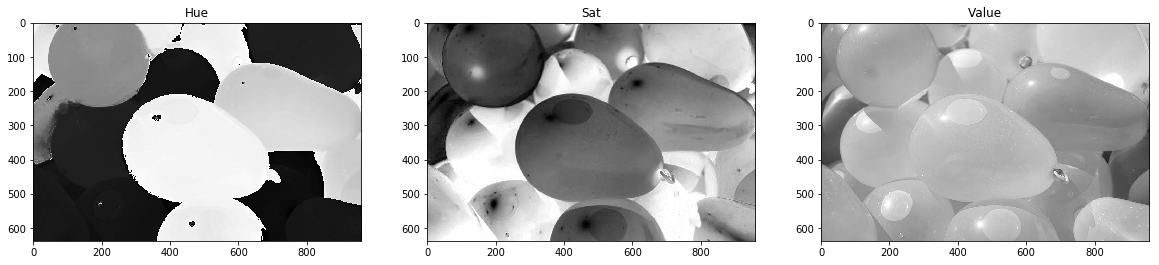

In [10]:
h = image_copy[:,:,0]
s = image_copy[:,:,1]
v = image_copy[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')
ax2.set_title('Sat')
ax2.imshow(s, cmap='gray')
ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

# here we notice that the hue value is pretty high for the pink balloon and even in shadow the hue value is pretty consistent. 
# the saturation and value varies a lot especially under shadows and edges of balloons. b

In [14]:
# color selection for the RGB values
lower_pink = np.array([180, 0, 100])
upper_pink = np.array([255, 255, 230])

In [15]:
# color selection for the HSV values
lower_hue = np.array([160,0,0])
upper_hue = np.array([180, 255, 255])

# Masking for both RGB and HSV

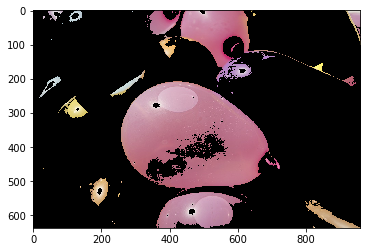

In [21]:
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)
masked_rgb_image = np.copy(image)
masked_rgb_image[mask_rgb == 0] = [0, 0, 0]
plt.imshow(masked_rgb_image)

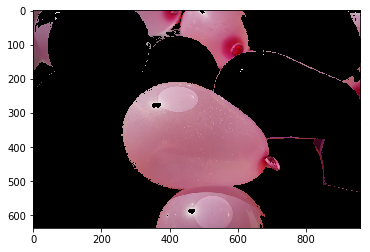

In [23]:
mask_hsv = cv2.inRange(image_copy, lower_hue, upper_hue)
masked_hsv_image = np.copy(image)
masked_hsv_image[mask_hsv == 0] = [0, 0, 0]
plt.imshow(masked_hsv_image)

In [24]:
masked_hsv_image.shape

(638, 960, 3)

In [29]:
# balloons in the sky

background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
background_image = background_image[0:638, 0:960]

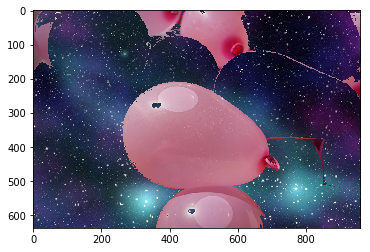

In [30]:
background_image[mask_hsv != 0] = [ 0, 0, 0]
final_image = background_image + masked_hsv_image
plt.imshow(final_image)